<a href="https://colab.research.google.com/github/izzul112/ML_BMLP_Submission-Image_Classification/blob/main/Submission3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-26 03:22:34--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.33MB/s    in 52s     

2021-06-26 03:23:27 (5.94 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp'
train_dir = os.path.join(base_dir, 'rockpaperscissors')

In [4]:
import os
import sys
import shutil
os.remove("/tmp/rockpaperscissors/README_rpc-cv-images.txt") #untuk menghapus file README_rpc-cv-images.txt
shutil.rmtree("/tmp/rockpaperscissors/rps-cv-images") #untuk menghapus folder rps-cv-images

In [5]:
os.listdir('/tmp/rockpaperscissors')

['rock', 'scissors', 'paper']

In [6]:
# membuat direktori paper pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')

# membuat direktori rock pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')

# membuat direktori scissors pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')

# membuat direktori paper pada direktori data validasi
validation_paper_dir = os.path.join(train_dir, 'paper')

# membuat direktori rock pada direktori data validasi
validation_paper_dir = os.path.join(train_dir, 'rock')

# membuat direktori scissors pada direktori data validasi
validation_scissors_dir = os.path.join(train_dir, 'scissors')

In [7]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)

In [8]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(200, 300),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas lebih maka menggunakan class_mode = 'categorical'
        class_mode="categorical",
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_dir, # direktori data validasi
        target_size=(200, 300), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas lebih maka menggunakan class_mode = 'categorical'
        class_mode='categorical',
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [9]:
# Callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.96 and logs.get('val_accuracy')>=0.96):
      print("\nReached 96% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.001,
                                           beta_1=0.9,
                                           beta_2=0.999,
                                           epsilon=1e-07,
                                           amsgrad=False,
                                           name='Adam'),
              metrics=['accuracy'])

In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=100,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # erapa batch yang akan dieksekusi pada setiap epoch
      verbose=2, callbacks=[callbacks])

Epoch 1/100
25/25 - 33s - loss: 1.3403 - accuracy: 0.3200 - val_loss: 1.0953 - val_accuracy: 0.6000
Epoch 2/100
25/25 - 2s - loss: 1.0986 - accuracy: 0.3300 - val_loss: 1.0578 - val_accuracy: 0.4500
Epoch 3/100
25/25 - 2s - loss: 1.0986 - accuracy: 0.4000 - val_loss: 1.0628 - val_accuracy: 0.5500
Epoch 4/100
25/25 - 2s - loss: 1.0963 - accuracy: 0.3776 - val_loss: 1.0596 - val_accuracy: 0.4000
Epoch 5/100
25/25 - 2s - loss: 0.8493 - accuracy: 0.6400 - val_loss: 0.8048 - val_accuracy: 0.6000
Epoch 6/100
25/25 - 2s - loss: 0.6762 - accuracy: 0.6900 - val_loss: 0.4590 - val_accuracy: 0.9000
Epoch 7/100
25/25 - 2s - loss: 0.4620 - accuracy: 0.8367 - val_loss: 0.3360 - val_accuracy: 0.8000
Epoch 8/100
25/25 - 2s - loss: 0.3476 - accuracy: 0.8700 - val_loss: 0.4812 - val_accuracy: 0.8500
Epoch 9/100
25/25 - 2s - loss: 0.3957 - accuracy: 0.8600 - val_loss: 0.6834 - val_accuracy: 0.7500
Epoch 10/100
25/25 - 2s - loss: 0.4573 - accuracy: 0.8265 - val_loss: 0.3129 - val_accuracy: 0.8500
Epoch 11

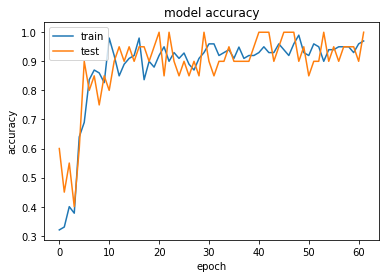

In [13]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

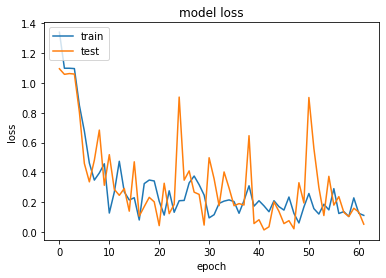

In [14]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving 0eqArS2GgsBeqgSn.png to 0eqArS2GgsBeqgSn.png
0eqArS2GgsBeqgSn.png
paper / kertas


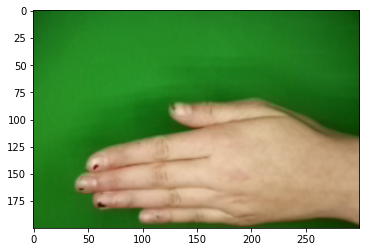

In [15]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  result = np.argmax (classes)
  
  print(fn)
  if classes[0][0]==1:
    print('paper / kertas')
  elif classes[0][1]==0:
    print('scissor / gunting')
  else:
    print('rock / batu')

Saving 0NDYNEoDui7o64gU.png to 0NDYNEoDui7o64gU.png
0NDYNEoDui7o64gU.png
rock / batu


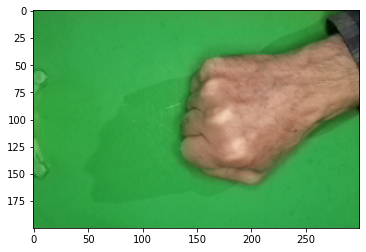

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  result = np.argmax (classes)
  
  print(fn)
  if classes[0][0]==1:
    print('paper / kertas')
  elif classes[0][1]==0:
    print('scissor / gunting')
  else:
    print('rock / batu')

Saving 5DdrFpDc8YbG1oCo.png to 5DdrFpDc8YbG1oCo.png
5DdrFpDc8YbG1oCo.png
scissor / gunting


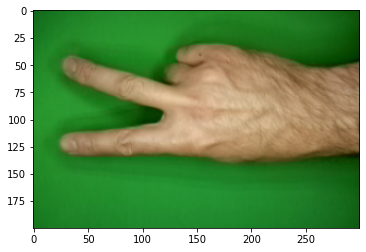

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  result = np.argmax (classes)
  
  print(fn)
  if classes[0][0]==1:
    print('paper / kertas')
  elif classes[0][1]==0:
    print('scissor / gunting')
  else:
    print('rock / batu')